In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics

In [2]:
train_data = pd.read_csv('aug_train.csv')
test_data = pd.read_csv('aug_test.csv')
y_test = np.load('answer.npy')
train_samples = len(train_data)
test_samples = len(test_data)
#print(train_samples, test_samples)

In [3]:
data = pd.concat([train_data, test_data])
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0.0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0.0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0.0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0.0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
78268,847,Male,43,1,39.0,0,1-2 Year,Yes,2630.0,124.0,26,NaN
78269,417524,Female,21,1,12.0,1,< 1 Year,No,32937.0,152.0,185,NaN
78270,188087,Male,48,1,29.0,1,1-2 Year,No,35247.0,124.0,101,NaN
78271,215680,Male,64,1,5.0,1,1-2 Year,No,25705.0,26.0,86,NaN


In [4]:
data = pd.get_dummies(data, columns=['Gender', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel'])
data

,id,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Female,Gender_Male,Region_Code_0.0,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,167647,22,1,1,2630.0,16,0.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,17163,42,1,0,43327.0,135,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,32023,66,1,0,35841.0,253,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87447,22,1,0,27645.0,69,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,501933,28,1,1,29023.0,211,0.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78268,847,43,1,0,2630.0,26,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
78269,417524,21,1,1,32937.0,185,NaN,1,0,0,...,1,0,0,0,0,0,0,0,0,0
78270,188087,48,1,1,35247.0,101,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
78271,215680,64,1,1,25705.0,86,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.loc[data['Response'] == 0, 'Response'] = -1 # changing negative class to -1 for SVM to work
data

,id,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Female,Gender_Male,Region_Code_0.0,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,167647,22,1,1,2630.0,16,-1.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,17163,42,1,0,43327.0,135,-1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,32023,66,1,0,35841.0,253,-1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87447,22,1,0,27645.0,69,-1.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,501933,28,1,1,29023.0,211,-1.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78268,847,43,1,0,2630.0,26,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
78269,417524,21,1,1,32937.0,185,NaN,1,0,0,...,1,0,0,0,0,0,0,0,0,0
78270,188087,48,1,1,35247.0,101,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
78271,215680,64,1,1,25705.0,86,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data = data.iloc[0:train_samples]
test_data = data.iloc[train_samples:]

In [7]:
test_data = test_data.drop('Response', axis=1)
test_data

,id,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Gender_Female,Gender_Male,Region_Code_0.0,Region_Code_1.0,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,57782,34,1,1,38244.0,146,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,286811,55,1,0,37577.0,109,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,117823,39,1,1,24578.0,63,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,213992,28,1,1,40507.0,129,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,324756,24,1,0,36783.0,201,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78268,847,43,1,0,2630.0,26,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
78269,417524,21,1,1,32937.0,185,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
78270,188087,48,1,1,35247.0,101,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
78271,215680,64,1,1,25705.0,86,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Remove id attribute since as it is irrelevant for training
train_data = train_data.drop('id', axis=1)
test_data = test_data.drop('id', axis=1)

In [9]:
X_train = train_data.drop('Response', axis=1)
y_train = train_data['Response']
X_test = test_data

In [10]:
#converting to np arrays to be able to use training functions
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

In [11]:
# Metric: choice of evaluation metric (f1, precision, recall, etc.)
# Proportion: proportion of test set to predict as 1s, if needed (logistic regression may predict all 0 by default)
def my_cross_val_imbalanced(model, metric, proportion, X, y, k=10):
    (n, d) = X.shape
    validation_metrics = np.zeros(k)
    for i in range(k):
        val_set = X[round(i*n/k):round((i+1)*n/k), :]
        val_labels = y[round(i*n/k):round((i+1)*n/k)]
        train_set = np.delete(X, [j for j in range(round(i*n/k), round((i+1)*n/k))], 0)
        train_labels = np.delete(y, [j for j in range(round(i*n/k), round((i+1)*n/k))], 0)
        model.fit(train_set, train_labels)
        if proportion == None:
            y_preds = model.predict(val_set)
        else:
            y_preds = model.predict_proportion(val_set, proportion)
        
        tp, fp, tn, fn = 0, 0, 0, 0
        score = 0
        for j in range(len(y_preds)):
            if val_labels[j] == 1 and y_preds[j] == 1:
                tp += 1
            elif val_labels[j] == 1:
                fn += 1
            elif y_preds[j] == 1:
                fp += 1
            else:
                tn += 1
        if tp == 0: # to avoid division by zero error for trivial models
            precision = 0
            recall = 0
        else:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)  
        if metric == 'precision':
            score = precision
        if metric == 'recall':
            score = recall
        if metric == 'f1':
            if precision + recall == 0:
                score = 0
            else:
                score = 2 * precision * recall / (precision + recall)
        if metric == 'auprc':
            score = sklearn.metrics.average_precision_score(val_labels, y_preds)
        validation_metrics[i] = score
    return validation_metrics

In [15]:
def precision_recall_f1(preds, truth):
    tp, fp, tn, fn = 0, 0, 0, 0
    for j in range(len(preds)):
        if truth[j] == 1 and preds[j] == 1:
            tp += 1
        elif truth[j] == 1:
            fn += 1
        elif preds[j] == 1:
            fp += 1
        else:
            tn += 1
    if tp + fp > 0:
        precision = tp / (tp + fp)
    else:
        precision = 0
    recall = tp / (tp + fn)
    if precision + recall > 0:
        f1 = 2 * precision * recall / (precision + recall)
    else: 
        f1 = 0
    return (precision, recall, f1)

In [12]:
class MySVM:

    def __init__(self, d, max_iters, eta_val, c):
        self.w = np.zeros(d)
        self.w_old = np.random.uniform(-0.01, 0.01, d)
        self.w_sum = np.zeros(d)
        self.w_sum += self.w_old
        self.max_iters = max_iters
        self.eta_val = eta_val
        self.c = c
        self.iters = 0
        self.losses = []
        self.gradient_magnitudes = []

    def fit(self, X, y):
        (n, d) = X.shape
        while self.iters < self.max_iters:
            i = np.random.randint(n)
            # compute loss; maybe modify for weighted?
            loss = (1/2)*np.linalg.norm(self.w_old)**2 + self.c*max(0, 1 - y[i]*(self.w_old @ X[i, :]))
            self.losses.append(loss)
            gradient_magnitude = 0
            for j in range(d):
                if y[i]*(self.w_old @ X[i, :]) < 1:
                    self.w[j] = self.w_old[j] - self.eta_val*(self.w_old[j] - self.c*y[i]*X[i,j])
                    gradient_magnitude += (self.w_old[j] - self.c*y[i]*X[i,j])**2
                else:
                    self.w[j] = self.w_old[j] - self.eta_val*(self.w_old[j])
                    gradient_magnitude += (self.w_old[j])**2
                self.w_old[j] = self.w[j]
            self.gradient_magnitudes.append(gradient_magnitude)
            self.w_sum += self.w
            self.iters += 1
            if np.average(self.gradient_magnitudes[-10:]) < 1e-6:
                break

    def predict(self, X):
        w_avg = self.w_sum / self.iters
        return np.sign(X @ w_avg)
    
    def predict_values(self, X):
        w_avg = self.w_sum / self.iters
        return X @ w_avg
    
    def predict_proportion(self, X, prop):
        w_avg = self.w_sum / self.iters
        values = X @ w_avg
        print(values)
        threshold = np.quantile(values, 1-prop)
        print("Threshold: ", threshold)
        preds = np.zeros(len(values))
        for i in range(len(preds)):
            if values[i] >= threshold:
                preds[i] = 1
            else:
                preds[i] = -1 # not having this ruined it???
        return preds

In [31]:
#SVM
eta_vals = [0.00001, 0.0001, 0.001]
C_vals = [1, 10, 100]
weights = [1, 2, 5, 10, 20, 50]
best_score = 0
best_eta, best_c, best_weight = (0, 0, 0)

(_, num_features) = X_train.shape
proportion = len(y_train[y_train == 1])/len(y_train)

for eta_val in eta_vals:
    for c_val in C_vals:
        for w in weights:

            # instantiate svm object
            svm = MyWeightedSVM(num_features, 100000, eta_val, c_val, w)

            # call to your CV function to compute error rates for each fold
            #cv_scores = my_cross_val_imbalanced(svm, 'f1', proportion, X_train, y_train, k=10)
            cv_scores = my_cross_val_imbalanced(svm, 'f1', None, X_train, y_train, k=10)

            # print error rates from CV
            print("Eta: " + str(eta_val))
            print("C: " + str(c_val))
            print("Weight: " + str(w))
            for i in range(10):
                print("F1 score for fold " + str(i) + ": " + str(cv_scores[i]))
            mean_score = sum(cv_scores)/len(cv_scores)
            print("Mean validation F1 score: " + str(mean_score))
            print("Validation F1 score stdev: " + str(np.std(cv_scores)))
            if mean_score >= best_score:
                best_score = mean_score
                best_eta, best_c, best_weight = (eta_val, c_val, w)

# instantiate svm object for best value of eta and C
print("Best eta value: " + str(best_eta))
print("Best C value: " + str(best_c))
best_svm = MyWeightedSVM(num_features, 100000, best_eta, best_c, best_weight)

# fit model using all training data
best_svm.fit(X_train, y_train)

# predict on test data
#y_preds = best_svm.predict_proportion(X_test, proportion)
y_preds = best_svm.predict(X_test)

# compute F1 score on test data
(precision, recall, f1) = precision_recall_f1(y_preds, y_test)
auprc = sklearn.metrics.average_precision_score(y_test, y_preds)

print("Test precision: " + str(precision))
print("Test recall: " + str(recall))
print("Test F1 score: " + str(f1))
print("Test AUPRC score: " + str(auprc)) 

Eta: 1e-05
C: 1
Weight: 1
F1 score for fold 0: 0.0
F1 score for fold 1: 0.0
F1 score for fold 2: 0.0
F1 score for fold 3: 0.0
F1 score for fold 4: 0.0
F1 score for fold 5: 0.0
F1 score for fold 6: 0.0
F1 score for fold 7: 0.0
F1 score for fold 8: 0.0
F1 score for fold 9: 0.0
Mean validation F1 score: 0.0
Validation F1 score stdev: 0.0
Eta: 1e-05
C: 1
Weight: 2
F1 score for fold 0: 0.0
F1 score for fold 1: 0.0
F1 score for fold 2: 0.0
F1 score for fold 3: 0.0
F1 score for fold 4: 0.0
F1 score for fold 5: 0.0
F1 score for fold 6: 0.0
F1 score for fold 7: 0.0
F1 score for fold 8: 0.0
F1 score for fold 9: 0.0
Mean validation F1 score: 0.0
Validation F1 score stdev: 0.0
Eta: 1e-05
C: 1
Weight: 5
F1 score for fold 0: 0.2752412537715383
F1 score for fold 1: 0.27395485574767053
F1 score for fold 2: 0.2732640705583377
F1 score for fold 3: 0.2758637882036197
F1 score for fold 4: 0.2748217224355458
F1 score for fold 5: 0.2755107112679557
F1 score for fold 6: 0.2779899648019172
F1 score for fold 7

Eta: 0.0001
C: 1
Weight: 1
F1 score for fold 0: 0.0
F1 score for fold 1: 0.0
F1 score for fold 2: 0.0
F1 score for fold 3: 0.0
F1 score for fold 4: 0.0
F1 score for fold 5: 0.0
F1 score for fold 6: 0.0
F1 score for fold 7: 0.0
F1 score for fold 8: 0.0
F1 score for fold 9: 0.0
Mean validation F1 score: 0.0
Validation F1 score stdev: 0.0
Eta: 0.0001
C: 1
Weight: 2
F1 score for fold 0: 0.0
F1 score for fold 1: 0.0
F1 score for fold 2: 0.0
F1 score for fold 3: 0.0
F1 score for fold 4: 0.0
F1 score for fold 5: 0.0
F1 score for fold 6: 0.0
F1 score for fold 7: 0.0
F1 score for fold 8: 0.0
F1 score for fold 9: 0.0
Mean validation F1 score: 0.0
Validation F1 score stdev: 0.0
Eta: 0.0001
C: 1
Weight: 5
F1 score for fold 0: 0.28262628078374974
F1 score for fold 1: 0.2822725638259619
F1 score for fold 2: 0.27910746853398777
F1 score for fold 3: 0.2811136598749607
F1 score for fold 4: 0.2805786146543385
F1 score for fold 5: 0.2840143691064212
F1 score for fold 6: 0.2829671564002336
F1 score for fo

Eta: 0.001
C: 1
Weight: 1
F1 score for fold 0: 0.0
F1 score for fold 1: 0.0
F1 score for fold 2: 0.0
F1 score for fold 3: 0.0
F1 score for fold 4: 0.0
F1 score for fold 5: 0.0
F1 score for fold 6: 0.0
F1 score for fold 7: 0.0
F1 score for fold 8: 0.0
F1 score for fold 9: 0.0
Mean validation F1 score: 0.0
Validation F1 score stdev: 0.0
Eta: 0.001
C: 1
Weight: 2
F1 score for fold 0: 0.0
F1 score for fold 1: 0.0
F1 score for fold 2: 0.0
F1 score for fold 3: 0.0
F1 score for fold 4: 0.0
F1 score for fold 5: 0.0
F1 score for fold 6: 0.0
F1 score for fold 7: 0.0
F1 score for fold 8: 0.0
F1 score for fold 9: 0.0
Mean validation F1 score: 0.0
Validation F1 score stdev: 0.0
Eta: 0.001
C: 1
Weight: 5
F1 score for fold 0: 0.28262628078374974
F1 score for fold 1: 0.2822725638259619
F1 score for fold 2: 0.27910746853398777
F1 score for fold 3: 0.2811136598749607
F1 score for fold 4: 0.2805786146543385
F1 score for fold 5: 0.2840143691064212
F1 score for fold 6: 0.2829671564002336
F1 score for fold 

Test precision: 0.1637601727287826
Test recall: 1.0
Test F1 score: 0.28143285286142433
Test AUPRC score: 0.1637601727287826


In [33]:
class MyWeightedSVM:

    def __init__(self, d, max_iters, eta_val, c, w1):
        self.w = np.zeros(d)
        self.w_old = np.random.uniform(-0.01, 0.01, d)
        self.w_sum = np.zeros(d)
        self.w_sum += self.w_old
        self.max_iters = max_iters
        self.eta_val = eta_val
        self.c = c
        self.iters = 0
        self.losses = []
        self.gradient_magnitudes = []
        self.w1 = w1

    def fit(self, X, y):
        (n, d) = X.shape
        while self.iters < self.max_iters:
            i = np.random.randint(n)
            # compute loss; maybe modify for weighted?
            class_weight = self.w1 if y[i] == 1 else 1
            loss = (1/2)*np.linalg.norm(self.w_old)**2 + self.c*class_weight*max(0, 1 - y[i]*(self.w_old @ X[i, :]))
            self.losses.append(loss)
            gradient_magnitude = 0
            for j in range(d):
                if y[i]*(self.w_old @ X[i, :]) < 1:
                    self.w[j] = self.w_old[j] - self.eta_val*(self.w_old[j] - self.c*class_weight*y[i]*X[i,j])
                    gradient_magnitude += (self.w_old[j] - self.c*class_weight*y[i]*X[i,j])**2
                else:
                    self.w[j] = self.w_old[j] - self.eta_val*(self.w_old[j])
                    gradient_magnitude += (self.w_old[j])**2
                self.w_old[j] = self.w[j]
            self.gradient_magnitudes.append(gradient_magnitude)
            self.w_sum += self.w
            self.iters += 1
            if np.average(self.gradient_magnitudes[-10:]) < 1e-6:
                break

    def predict(self, X):
        w_avg = self.w_sum / self.iters
        return np.sign(X @ w_avg)
    
    def predict_values(self, X):
        w_avg = self.w_sum / self.iters
        return X @ w_avg
    
    def predict_proportion(self, X, prop):
        w_avg = self.w_sum / self.iters
        values = X @ w_avg
        print(values)
        threshold = np.quantile(values, 1-prop)
        print("Threshold: ", threshold)
        preds = np.zeros(len(values))
        for i in range(len(preds)):
            if values[i] >= threshold:
                preds[i] = 1
            else:
                preds[i] = -1 # not having this ruined it???
        return preds

In [36]:
#SVM with proportion strategy
eta_vals = [0.00001, 0.0001, 0.001]
C_vals = [1, 10, 100]
weights = [1, 2, 5, 10, 20, 50]
best_score = 0
best_eta, best_c, best_weight = (0, 0, 0)

(_, num_features) = X_train.shape
proportion = len(y_train[y_train == 1])/len(y_train)

for eta_val in eta_vals:
    for c_val in C_vals:
        for w in weights:

            # instantiate svm object
            svm = MyWeightedSVM(num_features, 1000000, eta_val, c_val, w)

            # call to your CV function to compute error rates for each fold
            cv_scores = my_cross_val_imbalanced(svm, 'f1', proportion, X_train, y_train, k=10)
            #cv_scores = my_cross_val_imbalanced(svm, 'f1', None, X_train, y_train, k=10)

            # print error rates from CV
            print("Eta: " + str(eta_val))
            print("C: " + str(c_val))
            print("Weight: " + str(w))
            for i in range(10):
                print("F1 score for fold " + str(i) + ": " + str(cv_scores[i]))
            mean_score = sum(cv_scores)/len(cv_scores)
            print("Mean validation F1 score: " + str(mean_score))
            print("Validation F1 score stdev: " + str(np.std(cv_scores)))
            if mean_score >= best_score:
                best_score = mean_score
                best_eta, best_c, best_weight = (eta_val, c_val, w)

# instantiate svm object for best value of eta and C
print("Best eta value: " + str(best_eta))
print("Best C value: " + str(best_c))
best_svm = MyWeightedSVM(num_features, 1000000, best_eta, best_c, best_weight)

# fit model using all training data
best_svm.fit(X_train, y_train)

# predict on test data
y_preds = best_svm.predict_proportion(X_test, proportion)
#y_preds = best_svm.predict(X_test)
y_values = best_svm.predict_values(X_test)

# compute F1 score on test data
(precision, recall, f1) = precision_recall_f1(y_preds, y_test)
auprc = sklearn.metrics.average_precision_score(y_test, y_values)

print("Test precision: " + str(precision))
print("Test recall: " + str(recall))
print("Test F1 score: " + str(f1))
print("Test AUPRC score: " + str(auprc)) 

[ -340.78340826 -5714.30722881 -4769.92171392 ...  -401.37298046
 -4344.35603474 -3177.98718613]
Threshold:  -1877.295806877316
[-5506.79420643 -4705.89122078 -4167.95341576 ...  -342.3145942
 -2716.95301058 -4002.39715317]
Threshold:  -454.35452427253745
[-4454.05105841 -4294.37879242 -3645.94770465 ... -5628.9812671
 -4676.88084326  -371.92336495]
Threshold:  -2063.964574860334
[-5070.71454349 -4688.22434776 -5454.93369261 ... -3950.03884792
 -6523.75837462 -4437.27482084]
Threshold:  -1880.3021521865212
[-5609.2593175  -6107.42485473 -3291.99807446 ... -3834.9898055
  -339.80488442 -3807.74949837]
Threshold:  -456.9874443138388
[-6563.15441277 -4730.08667061  -374.76596402 ... -3865.76554071
 -3400.70999606 -6523.80675297]
Threshold:  -2125.3090884189382
[-4145.6048458  -3977.66453598 -3895.26116103 ... -4085.69116899
 -3516.75603956 -4494.16971387]
Threshold:  -447.0706700093037
[-5199.63282856 -4880.06379703 -7212.18897861 ... -5567.31389467
 -3472.95519515 -3884.77380078]
Thresho

KeyboardInterrupt: 

In [35]:
# instantiate svm object for best value of eta and C
print("Best eta value: " + str(best_eta))
print("Best C value: " + str(best_c))
print("Best weight: " + str(best_weight))
best_svm = MyWeightedSVM(num_features, 1000000, best_eta, best_c, best_weight)

# fit model using all training data
best_svm.fit(X_train, y_train)

# predict on test data
y_preds = best_svm.predict_proportion(X_test, proportion)
#y_preds = best_svm.predict(X_test)
y_values = best_svm.predict_values(X_test)

# compute F1 score on test data
(precision, recall, f1) = precision_recall_f1(y_preds, y_test)
auprc = sklearn.metrics.average_precision_score(y_test, y_values)

print("Test precision: " + str(precision))
print("Test recall: " + str(recall))
print("Test F1 score: " + str(f1))
print("Test AUPRC score: " + str(auprc)) 

Best eta value: 1e-05
Best C value: 10
Best weight: 10
[481841.85743339 486435.80520021 321143.54598108 ... 456453.68223765
 330605.62272964 306240.02100185]
Threshold:  557386.6855402336
Test precision: 0.2041023241304009
Test recall: 0.20416601653924168
Test F1 score: 0.20413416536661466
Test AUPRC score: 0.18683279665644137


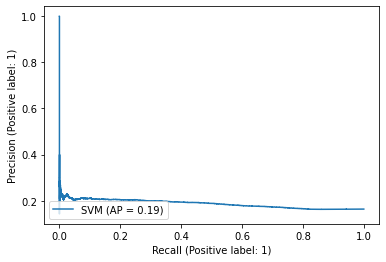

In [37]:
display = sklearn.metrics.PrecisionRecallDisplay.from_predictions(y_test, y_values, name="SVM")

In [30]:
print("Best weight: " + str(best_weight))

Best weight: 10


In [20]:
print(proportion)

2.616746128524103e-06


In [26]:
len(y_train[y_train == 1])

62601